In [148]:
# この Python 3 環境には、多くの便利な分析ライブラリがインストールされています
# これは、kaggle/python Docker イメージによって定義されています: https://github.com/kaggle/docker-python
# たとえば、ロードする便利なパッケージがいくつかあります


# Numpy（線形代数：ベクトルや行列の操作、数値計算を効率的に行う）をインポート
import numpy as np 

# Pandas（データ操作と分析のための強力なライブラリ。特に構造化データ（表形式データ）の処理に優秀）をインポート
# data processing, CSV file I/O (e.g. pd.read_csv)：このコードばデータ処理とCSVファイルの入出力（I/O）を行うためのものであることを示す。
import pandas as pd

# 入力データファイルは読み取り専用の「../input/」ディレクトリにあります
# たとえば、これを実行すると（実行をクリックするか、Shift+Enter を押す）、入力ディレクトリの下にあるすべてのファイルが一覧表示されます.

# OSモジュールのインプット
# オペレーティングシステムとの対話を行うための標準ライブラリ。ファイルシステム操作に使用。
import os

# 指定されたディレクトリ（ここでは/kaggle/input）を再帰的（全てのディレクトリを探索）に探索する。
for dirname, _, filenames in os.walk('/kaggle/input'):
    # 現在のディレクトリ内のすべてのファイルについてループ（繰り返し処理）を行う。
    for filename in filenames:
        # ディレクトリ名（dirname）とファイル名（filename）を結合して、完全なファイルパスを作成し、ファイルの完全なパスを出力する。
        print(os.path.join(dirname, filename))

# 「Save & Run All」を使用してバージョンを作成すると、現在のディレクトリ (/kaggle/working/) に最大 20 GB を書き込むことができ、出力として保存されます
# /kaggle/temp/ に一時ファイルを書き込むこともできますが、現在のセッション外には保存されません


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [149]:
#学習データ(train.csv)とテストデータ(test.csv)のデータフレームへの読み込み
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [150]:
#必要なライブラリのインポート

# matplotlib.pyplotのインポート、データの視覚化（プロット）を行う。
import matplotlib.pyplot as plt
# Jupyter Notebook内でプロットをインライン表示するためのもの,このコマンドを使用すると、プロットがノートブックのセル内に直接表示され、外部ウィンドウを開く必要がなくなる。
%matplotlib inline

# seabornのインポート,統計的データの視覚化を行う。
import seaborn as sns

#　データ操作や解析を行うためライブラリ。データを表形式（DataFrame）で扱いやすくなる。
import pandas as pd


# 1.データの確認をする。

In [151]:
#trainデータの確認
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [152]:
# trainの基本情報を表示
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [153]:
#trainの欠損値の確認
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [154]:
#テストデータの確認
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [155]:
# testの基本情報を表示
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [156]:
# testの基本情報を表示
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [157]:
# 欠損値の確認
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# 2.有用な特微量を見つける。

【背景】
：タイタニック号沈没：1912年4月14日

当時は、性別や階級による差別が存在しており（例：イギリスの三階級社会）、上等船室の乗客が優先的に救命ボートに乗ることができた。
下等客室の乗客は階級的に命は軽視されていた。
また、女性と子供が優先され救命ボートに乗っている：19世紀末から20世紀初頭にかけて、女性と子供（特に10歳以下）は「弱者」と見なされ、保護の対象とされており、船員たちも「女性と子供を優先する」という規則を守ることで、当時のコンプライアンスに応えることが求められていた。

船の構造：救命ボートは約1,180人分。対して乗員乗客は合計2,200人超と、約1,000人分が不足。
救命ボードは船の上層部に設置。
下等客室は船の下層部に位置しており、上層部へのアクセスが制限されていた。
沈没時には、下等客室の乗客が上層部に避難するのが困難だった（混乱を避けるため、上層部へアクセスする扉が遮断）

【避難時の心理等】：同乗者に兄弟、家族が多いと死亡率が高い傾向にある

救命ボートの数が限られていたため、大人数の家族全員が一緒に乗ることが難しい。特に、家族全員が一緒に行動しようとすると、全員が救命ボートに乗る機会を逃すことがある。
女性と子供が優先されたが、男性や年長の子供が後回しにされた。
大人数の家族が一緒に行動することで、混乱やパニックが生じやすくなり、迅速な避難が難しくなる。
特に、子供が多い家族では、全員を安全に避難させるのが困難だった。


【仮説】

①　女性は男性よりも生存率が高い

②　上等客室は優先される

③　上等客室の女性はより生存率が高い

④　10歳以下の子供は優先される。

⑤　家族が多いと避難が困難となる。

In [158]:
#① Sex（性別）の前処理

#male（男性）を0、famale（女性）を1に置き換える。
train=train.replace({'male':0, 'female':1})
train.head()

/tmp/ipykernel_30/3944136714.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train=train.replace({'male':0, 'female':1})


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Sex', ylabel='count'>

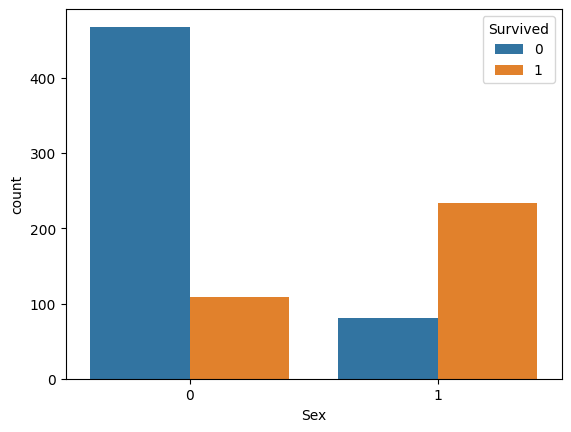

In [159]:
# ① 男女別生死を可視化（死亡：0、生存：1）
sns.countplot(x='Sex', hue='Survived', data=train)


In [160]:
#男女の乗船数とSurvivedの割合を確認

# 性別ごとの乗船者数を集計 
gender_counts = train['Sex'].value_counts()

# 性別ごとの生存者数を集計 
survival_counts = train[train['Survived'] == 1]['Sex'].value_counts()

# 性別ごとの生存率を計算 
survival_rate = (survival_counts / gender_counts) * 100

print(gender_counts)
print(survival_counts)
print(survival_rate)

Sex
0    577
1    314
Name: count, dtype: int64
Sex
1    233
0    109
Name: count, dtype: int64
Sex
0    18.890815
1    74.203822
Name: count, dtype: float64


男性の生存率は20%未満に対して、女性の生存率は74％であるため、sexは特微量として有用。


In [161]:
# ② Pclassのデータを確認する。

# 客室ごとの乗客数を集計
pclass_counts = train['Pclass'].value_counts()

# 結果を表示
print(pclass_counts)


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [162]:
# 客室ごとの生存者数と死亡者数を集計
pclass_survival_counts = train.groupby(['Pclass', 'Survived']).size().unstack()

# 結果を表示
print(pclass_survival_counts)


Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


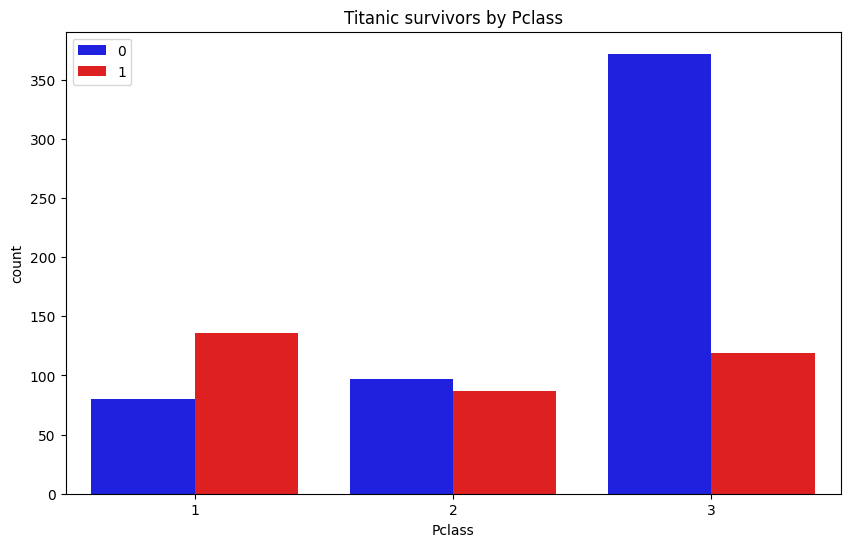

In [163]:
# グラフの描画

# カスタムカラーパレットの設定 
palette = {0: 'blue', 1: 'red'}

plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train, palette=palette)
plt.title('Titanic survivors by Pclass')
plt.xlabel('Pclass')
plt.ylabel('count')
plt.legend(['0', '1'], loc='upper left')
plt.show()


In [164]:
#各客室の生存率を計算
pclass_survival = train.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()

#生存率を％に変換 
pclass_survival = pclass_survival * 100

# 結果を表示 
print(pclass_survival)

Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253


上等客室の生存率は約62％
中等客室の生存率は約47％
下等客室の生存率は約24％

Pclassは特微量として有用


In [165]:
# ③上等客室（1等）の女性のみを抽出
first_class_women = train[(train['Pclass'] == 1) & (train['Sex'] == 1)]
first_class_women

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",1,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",1,45.0,1,1,36928,164.8667,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",1,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,83.1583,C50,C


In [166]:
# 生存者数をカウント
num_survived = first_class_women[first_class_women['Survived'] == 1].shape[0]

num_survived

91

In [167]:
# 総数をカウント
total_first_class_women = first_class_women.shape[0]

# 生存率を計算
survival_rate = (num_survived / total_first_class_women) * 100

# 生存率を表示
survival_rate

96.80851063829788

上等客室の女性の生存率は96%と高いため、特微量として有用


In [168]:
#10歳以下の子供は優先される傾向

# 10歳以下の子供を抽出
children_under_10 = train[train['Age'] <= 10]

# 抽出結果の表示
children_under_10.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",0,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",1,8.0,3,1,349909,21.0750,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",1,3.0,1,2,SC/Paris 2123,41.5792,NaN,C


In [169]:
# 10歳以下の子供の数をカウント
num_children_under_10 = children_under_10.shape[0]

num_children_under_10

64

In [170]:
# 生存者数をカウント
num_survived_children = children_under_10[children_under_10['Survived'] == 1].shape[0]
num_survived_children

38

In [171]:
# 10歳以下の子供の総数
total_children_under_10 = children_under_10.shape[0]

if total_children_under_10 > 0:
    
    # 生存者数をカウント
    num_survived_children = children_under_10[children_under_10['Survived'] == 1].shape[0]

    # 生存率を計算
    survival_rate_children = (num_survived_children / total_children_under_10) * 100

# 生存率を表示
survival_rate_children


59.375

10歳以下の子供の生存率は60％弱、高くもないが、低くもない。
10歳以下で絞るよりAgeでいく。

In [172]:
## ⑤　家族が多いと避難が困難

# 家族数ごとの生存者数と死亡者数を集計
family_survival_counts = train.groupby('SibSp')['Survived'].value_counts().unstack().fillna(0)
family_survival_counts

Survived,0,1
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,0.0
8,7.0,0.0


In [173]:
# 生存率を計算 
family_survival_counts['Total'] = family_survival_counts.sum(axis=1) 
family_survival_counts['Survival Rate'] = (family_survival_counts[1] / family_survival_counts['Total']) * 10

family_survival_counts

Survived,0,1,Total,Survival Rate
SibSp,,,,
0,398.0,210.0,608.0,3.453947
1,97.0,112.0,209.0,5.358852
2,15.0,13.0,28.0,4.642857
3,12.0,4.0,16.0,2.500000
4,15.0,3.0,18.0,1.666667
5,5.0,0.0,5.0,0.000000
8,7.0,0.0,7.0,0.000000


家族（同乗者）が1－2人の場合は、助け合いなどで生存率が高くなるが、3人以上だと避難に混乱が生じ生存率が低くなることがわかる。
優先順位も関係する。一人で逃げるのは気が引けるなどの心理的要因も関係するように思う。



# 3.必要なデータの前処理を行う。

sex,Pclass,,age,children_under_10,SipSb,Parchを特微量として使用してみる。

sex:train実施済

Pclass:前処理不要

first_class_women：trainの特微量は抽出済み。前処理済、dfの結合。testは全部

children_under_10：使用せず、Ageにする。

SibSb：前処理不要

Parch：前処理不要


## ① Sexの前処理、'male': 0 ,'female': 1 


In [174]:
#trainの確認

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [175]:
#テストデータの男女を0、1に置き換える。

test=test.replace({'male':0, 'female':1})
test.head()

/tmp/ipykernel_30/2707976029.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test=test.replace({'male':0, 'female':1})


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


## ②Ageの前処理

In [176]:
#Pclass毎にAgeの欠損値を中央値で埋める。

train.loc[train['Age'].isnull(), 'Age'] = train.groupby('Pclass')['Age'].transform('median')
test.loc[test['Age'].isnull(), 'Age'] = test.groupby('Pclass')['Age'].transform('median')

In [177]:
#trainの確認
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [178]:
#testの確認

test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## ③ first_class_women　の処理

In [179]:
# trainの上等客室の女性処理

# 上等客室の女性の特徴量を生成 
first_class_women = ((train['Pclass'] == 1) & (train['Sex'] == 1)).astype(int)

# first_class_womenをデータフレームに変換し、カラム名を指定 
first_class_women = pd.DataFrame(first_class_women, columns=['first_class_women'])

#欠損値を0で埋める
first_class_women.fillna(0, inplace=True)

#train dfに結合し、dfを確認する。
train_add_dum = pd.concat([train, first_class_women], axis=1 )
train_add_dum.head(10)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first_class_women
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",0,24.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,0


In [180]:
#テストデータを処理
# 上等客室の女性の特徴量を生成 
first_class_women = ((test['Pclass'] == 1) & (test['Sex'] == 1)).astype(int)

# first_class_womenをデータフレームに変換し、カラム名を指定 
first_class_women = pd.DataFrame(first_class_women, columns=['first_class_women'])

# 欠損値を0で埋める
first_class_women.fillna(0, inplace=True)

#train dfに結合し、dfを確認する。
test_add_dum_t = pd.concat([test, first_class_women], axis=1)
test_add_dum_t.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first_class_women
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,C,0
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,S,0


## ① 説明変数、目的変数を設定する。

In [181]:
#必要なライブラリのインポート
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

In [182]:
#説明変数にsex,Pclass,first_class_women,age,SipSb,Parchを設定

features = ['Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'first_class_women']

#目的変数にSurvivedを設定

target = 'Survived'

In [183]:
# トレーニングデータの設定

X_train = train_add_dum[features]

y_train = train_add_dum[target]

In [184]:
# テストデータの設定
X_test = test_add_dum_t[features]

## ![](http://)② モデルの学習


In [185]:
# モデルの作成と訓練

# ランダムフォレスト分類器のインスタンス化
rf = RandomForestClassifier(random_state=42)

# ハイパーパラメータの設定
param_grid = {
    'n_estimators': [10, 15, 20],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# グリッドサーチの設定
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# モデルの学習
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=15; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=20; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_s

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 15, 20]},
             verbose=2)

In [186]:
# 最適なモデルを取得 
best_rf = grid_search.best_estimator_
best_rf

RandomForestClassifier(max_depth=5, min_samples_split=6, n_estimators=10,
                       random_state=42)

## ③ モデルの予測をする。


In [187]:
# テストデータで予測 
y_pred = best_rf.predict(X_test)
y_pred


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## 3.データの提出


In [188]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_pred})
submission.to_csv('submission_Kadai_titanic_2_1.csv', index = False )